# Project: Investigate a Dataset - [TMDb data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: This data set contains information about 10,000 movies collected from the Movie Database (TMDb), including user ratings and revenue. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

### Insight(s) for Analysis
>Some of the questions I intend to answer in this dataset are; 

- What are all times highest and lowest profit movie?
- What is all times top 10 movies which earn the highest profit?
- What is the all times highest and lowest budget movie?
- What is all times top 10 movies which have the highest budget?
- What is the All times highest and lowest revenue movie?
- What is all times top 10 movies which have the highest revenue?
- What is the All most popular and least popular movie?
- What is all times top 10 most popular which movie?

### Question(s) for Analysis
- how does budget affect revenue?
- how does budget affect popularity
- does popularity affect profit?
- does popularity affect rating?
- who is thr most popular director?
- which of the directors generated the most revenue?

In [2]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, I will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

### In the code below, i will load the data and print out a few lines.

In [4]:
import pandas as pd
url = "https://drive.google.com/file/d/1p5kVmop9QIUk2poLg0wJk7KWfLuM90YO/view?usp=sharing"
file_id = url.split('/')[-2]
new_url = "https://drive.google.com/uc?id=" + file_id
df = pd.read_csv(new_url)
df.head(6)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

 ### I will perform operations to inspect data types and look for instances of missing or possibly errant data.
> **Investigating the dataset**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### I will invesigate the dataset using the code below

In [3]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Noticed some weird zeros and replacing them with null values

In [5]:
import numpy as np
df[['revenue', 'budget']] = df[['revenue', 'budget']].replace(0, np.NAN)

### The code below check for null values

In [6]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Cleaning the null values discovered above 

In [7]:
df.dropna(inplace = True)

### Checking again to see if all null values have been cleared

In [8]:
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

### Change the datatype of release date to dates datatype

In [31]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 22 columns):
id                      1287 non-null int64
imdb_id                 1287 non-null object
popularity              1287 non-null float64
budget                  1287 non-null float64
revenue                 1287 non-null float64
original_title          1287 non-null object
cast                    1287 non-null object
homepage                1287 non-null object
director                1287 non-null object
tagline                 1287 non-null object
keywords                1287 non-null object
overview                1287 non-null object
runtime                 1287 non-null int64
genres                  1287 non-null object
production_companies    1287 non-null object
release_date            1287 non-null datetime64[ns]
vote_count              1287 non-null int64
vote_average            1287 non-null float64
release_year            1287 non-null int64
budget_adj              1287 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that I've trimmed and cleaned the data, I will move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions posed in the Introduction section. I would compute the relevant statistics throughout the analysis and make inference about the data.
<a id='Question5'></a>
### What movie generated the highest revenue?

In [17]:
df[df['revenue'] == df['revenue'].max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,popularity_level
1386,19995,tt0499549,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,High


### Top 20 movies with largest budget

In [59]:
revenue = df.nlargest(n = 20, columns = ['budget']).reset_index()
revenue

,index,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,2244,46528,tt1032751,0.250540,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,4.250000e+08,1.108757e+07,-413912431
1,3375,1865,tt1298650,4.955130,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,http://disney.go.com/pirates/index-on-stranger...,Rob Marshall,...,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,2011-05-11,3180,6.3,2011,3.683713e+08,9.904175e+08,641683000
2,7387,285,tt0449088,4.965391,300000000,961000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,http://disney.go.com/disneypictures/pirates/,Gore Verbinski,...,169,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,2007-05-19,2626,6.8,2007,3.155006e+08,1.010654e+09,661000000
3,14,99861,tt2395427,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,http://marvel.com/movies/movie/193/avengers_ag...,Joss Whedon,...,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,4304,7.4,2015,2.575999e+08,1.292632e+09,1125035767
4,1929,38757,tt0398286,2.865684,260000000,591794936,Tangled,Zachary Levi|Mandy Moore|Donna Murphy|Ron Perl...,http://disney.go.com/disneypictures/tangled/,Nathan Greno|Byron Howard,...,100,Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2010-11-24,2019,7.3,2010,2.600000e+08,5.917949e+08,331794936
5,4411,49529,tt0401729,1.588457,260000000,284139100,John Carter,Taylor Kitsch|Lynn Collins|Mark Strong|Willem ...,http://disney.go.com/johncarter/,Andrew Stanton,...,132,Action|Adventure|Fantasy|Science Fiction,Walt Disney Pictures,2012-03-07,1479,6.0,2012,2.469335e+08,2.698595e+08,24139100
6,7394,559,tt0413300,2.520912,258000000,890871626,Spider-Man 3,Tobey Maguire|Kirsten Dunst|James Franco|Thoma...,http://www.sonypictures.com/movies/spider-man3/,Sam Raimi,...,139,Fantasy|Action|Adventure,Columbia Pictures|Laura Ziskin Productions|Mar...,2007-05-01,2083,5.8,2007,2.713305e+08,9.369017e+08,632871626
7,5508,57201,tt1210819,1.214510,255000000,89289910,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,http://disney.go.com/the-lone-ranger/,Gore Verbinski,...,149,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,2013-07-03,1607,6.0,2013,2.386885e+08,8.357833e+07,-165710090
8,634,122917,tt2310332,10.174599,250000000,955119788,The Hobbit: The Battle of the Five Armies,Martin Freeman|Ian McKellen|Richard Armitage|K...,http://www.thehobbit.com/,Peter Jackson,...,144,Adventure|Fantasy,WingNut Films|New Line Cinema|3Foot7|Metro-Gol...,2014-12-10,3110,7.1,2014,2.302728e+08,8.797523e+08,705119788
9,643,127585,tt1877832,6.052479,250000000,746000000,X-Men: Days of Future Past,Hugh Jackman|James McAvoy|Patrick Stewart|Mich...,http://www.x-menmovies.com/,Bryan Singer,...,131,Action|Adventure|Fantasy|Science Fiction,Twentieth Century Fox Film Corporation|Donners...,2014-05-15,4006,7.6,2014,2.302728e+08,6.871339e+08,496000000


<a id='Question5'></a>
### What movie  generated the least revenue?

In [13]:
df[df['revenue'] == df['revenue'].min()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2398,39356,tt1560139,0.028456,3,43,Boy,James Rolleston|Craig Hall|Taika Waititi|Te Ah...,http://www.boythemovie.co.nz,Taika Waititi,"Summer, Girls, Gangs, Drugs ... its not easy b...",...,"It's 1984, and Michael Jackson is king - even ...",87,Drama|Comedy,New Zealand Film Commission|Unison Films|Whenu...,2010-02-14,26,7.3,2010,3,43


In [61]:
df[df["release_year"] <= 2000]


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1329,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",...,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09,764398007
1330,691,tt0076752,2.379469,14000000,185438673,The Spy Who Loved Me,Roger Moore|Barbara Bach|Curd JÃ¼rgens|Richard...,http://www.mgm.com/view/movie/1891/The-Spy-Who...,Lewis Gilbert,It's the BIGGEST. It's the BEST. It's BOND. An...,...,125,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,1977-07-07,279,6.2,1977,5.036893e+07,6.671677e+08,171438673
2409,550,tt0137523,8.947905,63000000,100853753,Fight Club,Edward Norton|Brad Pitt|Meat Loaf|Jared Leto|H...,http://www.foxmovies.com/movies/fight-club,David Fincher,How much can you know about yourself if you've...,...,139,Drama,Regency Enterprises|Fox 2000 Pictures|Taurus F...,1999-10-14,5923,8.1,1999,8.247033e+07,1.320229e+08,37853753
2410,603,tt0133093,7.753899,63000000,463517383,The Matrix,Keanu Reeves|Laurence Fishburne|Carrie-Anne Mo...,http://www.warnerbros.com/matrix,Lilly Wachowski|Lana Wachowski,Welcome to the Real World.,...,136,Action|Science Fiction,Village Roadshow Pictures|Groucho II Film Part...,1999-03-30,6351,7.8,1999,8.247033e+07,6.067687e+08,400517383
2411,14,tt0169547,3.555720,15000000,356296601,American Beauty,Kevin Spacey|Annette Bening|Thora Birch|Wes Be...,http://www.dreamworks.com/ab/,Sam Mendes,Look closer.,...,122,Drama,DreamWorks SKG|Jinks/Cohen Company,1999-09-15,1756,7.7,1999,1.963579e+07,4.664111e+08,341296601
2412,1893,tt0120915,3.526029,115000000,924317558,Star Wars: Episode I - The Phantom Menace,Liam Neeson|Ewan McGregor|Natalie Portman|Jake...,http://www.starwars.com/films/star-wars-episod...,George Lucas,Every generation has a legend. Every journey h...,...,136,Adventure|Action|Science Fiction,Lucasfilm,1999-05-19,2823,6.3,1999,1.505411e+08,1.209981e+09,809317558
2413,564,tt0120616,2.943770,80000000,415885488,The Mummy,Brendan Fraser|Rachel Weisz|John Hannah|Arnold...,http://www.mummyvideo.com/,Stephen Sommers,The legend you know. The adventure you have ye...,...,124,Adventure|Fantasy|Horror|Action|Thriller,Universal Pictures|Alphaville Films,1999-05-06,1562,6.3,1999,1.047242e+08,5.444161e+08,335885488
2414,497,tt0120689,2.719461,60000000,284600000,The Green Mile,Tom Hanks|Michael Clarke Duncan|David Morse|Bo...,http://thegreenmile.warnerbros.com/,Frank Darabont,Miracles do happen.,...,189,Fantasy|Drama|Crime,Castle Rock Entertainment|Darkwoods Production...,1999-12-10,2299,8.0,1999,7.854317e+07,3.725564e+08,224600000
2416,36643,tt0143145,2.129874,135000000,361832400,The World Is Not Enough,Pierce Brosnan|Sophie Marceau|Robert Carlyle|D...,http://www.mgm.com/view/movie/231/The-World-Is...,Michael Apted,As the countdown begins for the new millennium...,...,128,Adventure|Action|Thriller,Eon Productions,1999-11-08,509,6.0,1999,1.767221e+08,4.736577e+08,226832400
2421,1844,tt0137494,1.820318,66000000,212404396,Entrapment,Sean Connery|Catherine Zeta-Jones|Will Patton|...,http://www.foxmovies.com.au/entrapment,Jon Amiel,The trap is set.,...,112,Romance|Drama|Mystery,Fountainbridge Films|Regency Enterprises,1999-04-30,355,5.9,1999,8.639749e+07,2.780486e+08,146404396


In [33]:
#Function to count values in a column
def count_value(columns, column_values):
    count = 0
    for i in df[columns]:
        if column_values in i:
            count += 1
    return count

In [31]:
#Check for Adventure movies
print("There are",count_value('genres', "Adventure"),"movies related to Adventure")

There are 297 movies related to Adventure


In [32]:
#Check for Romantic movies
print("There are",count_value('genres', "Romance"),"movies related to Romance")

There are 196 movies related to Romance


In [38]:
#Check for Romantic movies
print("There are",count_value('genres', "History"),"movies related to History")

There are 35 movies related to History


In [37]:
#Check for Romantic movies
print("There are",count_value('genres', "War"),"movies related to War")

There are 32 movies related to War


In [36]:
#Check for Romantic movies
print("There are",count_value('genres', "Family"),"movies related to Family")

There are 163 movies related to Family


In [35]:
#Check for Romantic movies
print("There are",count_value('genres', "Music"),"movies related to Music")

There are 38 movies related to Music


In [34]:
#Check for Romantic movies
print("There are",count_value('genres', "Horror"),"movies related to Horror")

There are 139 movies related to Horror


In [74]:
range1 = df['release_year'].max() - df["release_year"].min()
print("The dataset contains",range1,"years of movie data")

The dataset contains 54 years of movie data


<a id='Question3'></a>
### What movie exhausted the most budget?

In [14]:
df[df['budget'] == df['budget'].max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,46528,tt1032751,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,Assassin. Hero. Legend.,...,An Asian assassin (Dong-gun Jang) is forced to...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,425000000,11087569


<a id='Question3'></a>
### What movie exhausted the least budget?

In [15]:
df[df['budget'] == df['budget'].min()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3581,59296,tt1436559,0.52043,1,1378,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,http://www.ifcfilms.com/films/love-wedding-mar...,Dermot Mulroney,Here comes the ride.,...,A happy newlywed marriage counselor's views on...,90,Comedy|Romance,120dB Films|Scion Films|Voodoo Production Serv...,2011-06-03,55,5.3,2011,0.969398,1335.830503


<a id='Question7'></a>
### What is the all time most popular movie?

In [16]:
df[df['popularity'] == df['popularity'].max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


<a id='Question7'></a>
### What is the all time least popular movie?

In [17]:
df[df['popularity'] == df['popularity'].min()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
6065,203793,tt1966566,0.010335,30000000,68129518,Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´,Thomas Kretschmann|Yanina Studilina|Philippe R...,http://www.StalingradMovie.net,Fyodor Bondarchuk,The Epic Battle That Turned The Tide Of World ...,...,"Drama set in 1942, during one of the most impo...",131,War|Action,Art Pictures Studio,2013-10-09,64,5.5,2013,28081000.582213,63771501.154129


In [10]:
#Calculate profit from budget and revenue
df['profit'] = df['revenue'] - df['budget']

<a id='Question1'></a>
### What movie generated the most profit?

In [19]:
df[df['profit'] == df['profit'].max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,2544505847


<a id='Question1'></a>
### Movie that generated the least profit

In [20]:
df[df['profit'] == df['profit'].min()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
2244,46528,tt1032751,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,Assassin. Hero. Legend.,...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,425000000,11087569,-413912431


### What are the movies with the highest profit per year?

In [50]:
result = df[df['release_year'] >= 1961].groupby(['release_year', 'original_title']).profit.max().unstack().T.agg(['max', 'idxmax']).T
result

AttributeError: 'DataFrame' object has no attribute 'agg'

<a id='Question3'></a>
### What are the top 10 movies with the smallest budget?

In [48]:
budget_low = df.nsmallest(n = 10, columns =['budget'])
budget_low

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
3581,59296,tt1436559,0.520430,1,1378,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,http://www.ifcfilms.com/films/love-wedding-mar...,Dermot Mulroney,Here comes the ride.,...,90,Comedy|Romance,120dB Films|Scion Films|Voodoo Production Serv...,2011-06-03,55,5.3,2011,0.969398,1.335831e+03,1377
2398,39356,tt1560139,0.028456,3,43,Boy,James Rolleston|Craig Hall|Taika Waititi|Te Ah...,http://www.boythemovie.co.nz,Taika Waititi,"Summer, Girls, Gangs, Drugs ... its not easy b...",...,87,Drama|Comedy,New Zealand Film Commission|Unison Films|Whenu...,2010-02-14,26,7.3,2010,3.000000,4.300000e+01,40
9992,1669,tt0099810,1.072912,30,200,The Hunt for Red October,Alec Baldwin|Sean Connery|Scott Glenn|Sam Neil...,http://www.paramount.com/movies/hunt-red-october,John McTiernan,Invisible. Silent. Stolen.,...,134,Action|Adventure|Thriller,Paramount Pictures|Nina Saxon Film Design|Mace...,1990-03-02,615,6.9,1990,50.066956,3.337797e+02,170
3968,4614,tt0164184,0.958182,68,193,The Sum of All Fears,Ben Affleck|Morgan Freeman|James Cromwell|Ken ...,http://www.paramount.com/movies/sum-all-fears,Phil Alden Robinson,"27,000 nuclear weapons. One is missing.",...,124,Thriller|Action|Drama,Paramount Pictures|Mace Neufeld Productions|MF...,2002-05-31,256,5.7,2002,82.433775,2.339664e+02,125
1733,22717,tt1084972,0.278387,75,134,Wanted,Salman Khan|Ayesha Takia|Mahesh Manjrekar|Prak...,http://www.wanted-thefilm.com/,Prabhu Deva,"Mafia wants him DEAD !, Police wants him ALIVE !!",...,129,Action|Comedy|Crime|Thriller,Sahara One Motion Pictures,2009-09-18,18,4.9,2009,76.230033,1.361977e+02,59
3608,50217,tt0893412,0.463510,93,2500000,From Prada to Nada,Camilla Belle|Alexa PenaVega|April Bowlby|Wilm...,http://frompradatonadamovie.com/,Angel Gracia,A riches to rags story.,...,107,Comedy|Drama|Romance,Lewis Gilbert Productions|Lionsgate|Modern Vid...,2011-01-28,47,5.2,2011,90.154018,2.423495e+06,2499907
7044,14337,tt0390384,0.856329,7000,424760,Primer,Shane Carruth|David Sullivan|Casey Gooden|Anan...,http://www.primermovie.com,Shane Carruth,What happens if it actually works?,...,79,Science Fiction|Drama|Thriller,Thinkfilm,2004-10-08,341,6.9,2004,8081.117799,4.903622e+05,417760
3755,79120,tt1714210,0.243777,8000,469947,Weekend,Tom Cullen|Chris New|Jonathan Race|Laura Freem...,http://weekenderfilm.tumblr.com/,Andrew Haigh,A (sort of) love story between two guys over a...,...,96,Drama|Romance,EM Media|The Bureau|Glendale Picture Company|S...,2011-09-22,96,7.4,2011,7755.184341,4.555657e+05,461947
7447,23827,tt1179904,1.120442,15000,193355800,Paranormal Activity,Katie Featherston|Micah Sloat|Mark Fredrichs|A...,http://www.paranormalactivity-movie.com/,Oren Peli,What Happens When You Sleep?,...,86,Horror|Mystery,Blumhouse Productions|Solana Films,2007-09-14,714,6.1,2007,15775.028739,2.033462e+08,193340800
3785,58699,tt1242599,0.195283,17000,101236,Bellflower,Evan Glodell|Jessie Wiseman|Tyler Dawson|Rebek...,http://www.coatwolf.com/,Evan Glodell,A love story with apocalyptic stakes.,...,106,Action|Drama|Romance,Coatwolf Productions,2011-04-16,24,6.7,2011,16479.766724,9.813798e+04,84236


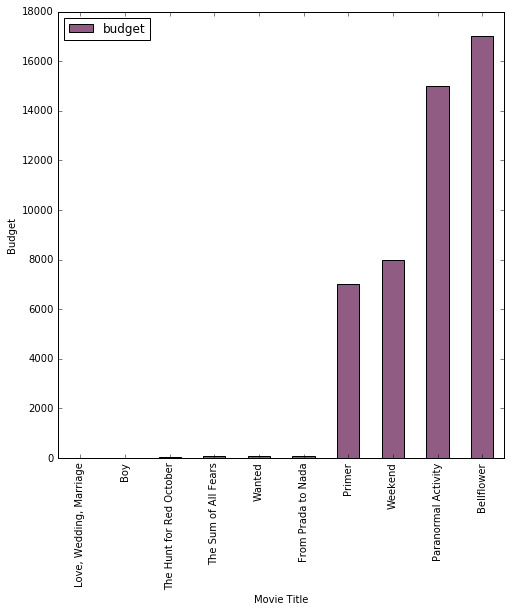

In [99]:
#plot of the top 10 movies with the smallest budget
budget_low.plot(x = 'original_title', y = 'budget', kind = "bar", figsize=(8,8), color = "#915c83")
plt.xlabel('Movie Title')
plt.ylabel('Budget')

<a id='Question3'></a>
### What are the top 10 movies with the highest budget?

In [45]:
budget = df.nlargest(n = 10, columns = ['budget'])
budget

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
2244,46528,tt1032751,0.250540,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,Assassin. Hero. Legend.,...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,4.250000e+08,1.108757e+07,-413912431
3375,1865,tt1298650,4.955130,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,http://disney.go.com/pirates/index-on-stranger...,Rob Marshall,Live Forever Or Die Trying.,...,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,2011-05-11,3180,6.3,2011,3.683713e+08,9.904175e+08,641683000
7387,285,tt0449088,4.965391,300000000,961000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,http://disney.go.com/disneypictures/pirates/,Gore Verbinski,"At the end of the world, the adventure begins.",...,169,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,2007-05-19,2626,6.8,2007,3.155006e+08,1.010654e+09,661000000
14,99861,tt2395427,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,http://marvel.com/movies/movie/193/avengers_ag...,Joss Whedon,A New Age Has Come.,...,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,4304,7.4,2015,2.575999e+08,1.292632e+09,1125035767
1929,38757,tt0398286,2.865684,260000000,591794936,Tangled,Zachary Levi|Mandy Moore|Donna Murphy|Ron Perl...,http://disney.go.com/disneypictures/tangled/,Nathan Greno|Byron Howard,They're taking adventure to new lengths.,...,100,Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2010-11-24,2019,7.3,2010,2.600000e+08,5.917949e+08,331794936
4411,49529,tt0401729,1.588457,260000000,284139100,John Carter,Taylor Kitsch|Lynn Collins|Mark Strong|Willem ...,http://disney.go.com/johncarter/,Andrew Stanton,Lost in Our World. Found in Another.,...,132,Action|Adventure|Fantasy|Science Fiction,Walt Disney Pictures,2012-03-07,1479,6.0,2012,2.469335e+08,2.698595e+08,24139100
7394,559,tt0413300,2.520912,258000000,890871626,Spider-Man 3,Tobey Maguire|Kirsten Dunst|James Franco|Thoma...,http://www.sonypictures.com/movies/spider-man3/,Sam Raimi,The battle within.,...,139,Fantasy|Action|Adventure,Columbia Pictures|Laura Ziskin Productions|Mar...,2007-05-01,2083,5.8,2007,2.713305e+08,9.369017e+08,632871626
5508,57201,tt1210819,1.214510,255000000,89289910,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,http://disney.go.com/the-lone-ranger/,Gore Verbinski,Never Take Off the Mask,...,149,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,2013-07-03,1607,6.0,2013,2.386885e+08,8.357833e+07,-165710090
634,122917,tt2310332,10.174599,250000000,955119788,The Hobbit: The Battle of the Five Armies,Martin Freeman|Ian McKellen|Richard Armitage|K...,http://www.thehobbit.com/,Peter Jackson,Witness the defining chapter of the Middle-Ear...,...,144,Adventure|Fantasy,WingNut Films|New Line Cinema|3Foot7|Metro-Gol...,2014-12-10,3110,7.1,2014,2.302728e+08,8.797523e+08,705119788
643,127585,tt1877832,6.052479,250000000,746000000,X-Men: Days of Future Past,Hugh Jackman|James McAvoy|Patrick Stewart|Mich...,http://www.x-menmovies.com/,Bryan Singer,"To save the future, they must alter the past",...,131,Action|Adventure|Fantasy|Science Fiction,Twentieth Century Fox Film Corporation|Donners...,2014-05-15,4006,7.6,2014,2.302728e+08,6.871339e+08,496000000


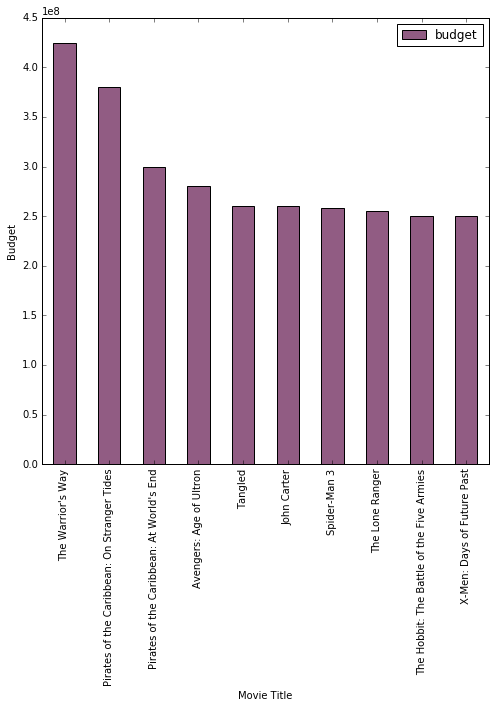

In [102]:
#Plot of top 10 movies with the highest budget
budget.plot(x = 'original_title', y = 'budget', kind = "bar", figsize=(8,8), color = "#915c83")
plt.xlabel("Movie Title")
plt.ylabel("Budget")

<a id='Question5'></a>
###  What are the bottom 10 teams that generated the least revenue?

In [43]:
revenue_low = df.nsmallest(n = 10, columns = ["revenue"])
revenue_low

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
2398,39356,tt1560139,0.028456,3,43,Boy,James Rolleston|Craig Hall|Taika Waititi|Te Ah...,http://www.boythemovie.co.nz,Taika Waititi,"Summer, Girls, Gangs, Drugs ... its not easy b...",...,87,Drama|Comedy,New Zealand Film Commission|Unison Films|Whenu...,2010-02-14,26,7.3,2010,3.000000,43.000000,40
7506,2196,tt0795368,0.642207,9000000,46,Death at a Funeral,Matthew Macfadyen|Alan Tudyk|Peter Dinklage|Ke...,http://www.deathatafuneral-themovie.com/,Frank Oz,From director Frank Oz comes the story of a fa...,...,90,Comedy|Drama,Sidney Kimmel Entertainment|Parabolic Pictures...,2007-02-09,262,6.7,2007,9465017.243684,48.376755,-8999954
1733,22717,tt1084972,0.278387,75,134,Wanted,Salman Khan|Ayesha Takia|Mahesh Manjrekar|Prak...,http://www.wanted-thefilm.com/,Prabhu Deva,"Mafia wants him DEAD !, Police wants him ALIVE !!",...,129,Action|Comedy|Crime|Thriller,Sahara One Motion Pictures,2009-09-18,18,4.9,2009,76.230033,136.197658,59
3968,4614,tt0164184,0.958182,68,193,The Sum of All Fears,Ben Affleck|Morgan Freeman|James Cromwell|Ken ...,http://www.paramount.com/movies/sum-all-fears,Phil Alden Robinson,"27,000 nuclear weapons. One is missing.",...,124,Thriller|Action|Drama,Paramount Pictures|Mace Neufeld Productions|MF...,2002-05-31,256,5.7,2002,82.433775,233.966449,125
9992,1669,tt0099810,1.072912,30,200,The Hunt for Red October,Alec Baldwin|Sean Connery|Scott Glenn|Sam Neil...,http://www.paramount.com/movies/hunt-red-october,John McTiernan,Invisible. Silent. Stolen.,...,134,Action|Adventure|Thriller,Paramount Pictures|Nina Saxon Film Design|Mace...,1990-03-02,615,6.9,1990,50.066956,333.779708,170
3581,59296,tt1436559,0.520430,1,1378,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,http://www.ifcfilms.com/films/love-wedding-mar...,Dermot Mulroney,Here comes the ride.,...,90,Comedy|Romance,120dB Films|Scion Films|Voodoo Production Serv...,2011-06-03,55,5.3,2011,0.969398,1335.830503,1377
1780,38850,tt1139282,0.220819,2000000,7306,Stolen Lives,Jon Hamm|Josh Lucas|Rhona Mitra|James Van Der ...,http://www.ifcfilms.com/films/stolen,Anders Anderson,Secrets from the past don't stay buried.,...,97,Crime|Drama|Mystery|Thriller,Capitol Films|Boy in the Box|2 Bridges Product...,2009-10-10,12,6.0,2009,2032800.868250,7425.821572,-1992694
818,242042,tt2355495,0.728025,6000000,15071,Barefoot,Evan Rachel Wood|Scott Speedman|J.K. Simmons|T...,http://barefootthemovie.com/,Andrew Fleming,She's stepping out into the world.,...,90,Comedy|Drama|Romance,WhiteFlame Productions,2014-02-02,129,6.5,2014,5526546.304629,13881.763226,-5984929
1561,31723,tt1247704,0.534693,3000000,18097,Women in Trouble,Carla Gugino|Adrianne Palicki|Connie Britton|M...,http://www.womenintroublethemovie.com/,Sebastian Gutierrez,"High Hopes, High Anxiety, High Heels.",...,92,Comedy|Drama,Gato Negro Films,2009-11-13,11,4.5,2009,3049201.302375,18393.798656,-2981903
2445,8374,tt0144117,0.992316,6000000,30471,The Boondock Saints,Willem Dafoe|Norman Reedus|Sean Patrick Flaner...,http://www.theboondocksaints.com,Troy Duffy,Thy Kingdom Come. Thy Will Be Done.,...,108,Action|Thriller|Crime,Franchise Pictures|Brood Syndicate|B.D.S. Prod...,1999-01-22,521,7.1,1999,7854317.079566,39888.149289,-5969529


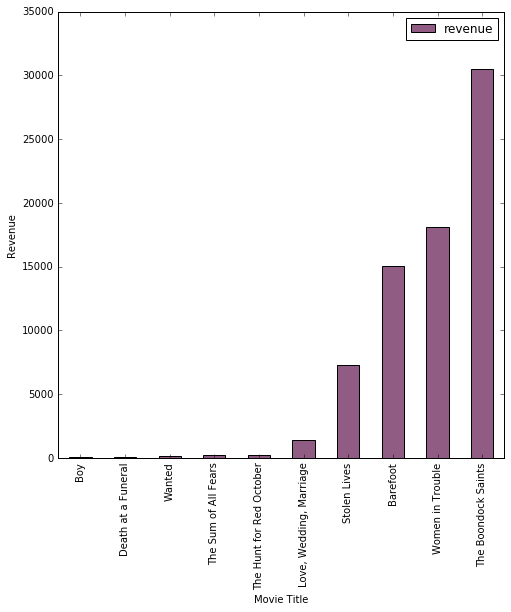

In [44]:
#Plot the bottom 10 movies by revenue
%matplotlib inline
revenue_low.plot(x = 'original_title', y = 'revenue', kind = 'bar', figsize=(8,8), color = ["#915c83"])
plt.xlabel("Movie Title")
plt.ylabel("Revenue")

<a id='Question5'></a>
### What are the top 10 movies that generated the most revenue?

In [41]:
revenue = df.nlargest(n = 10, columns = ['revenue'])
revenue

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,2544505847
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09,1645034188
4361,24428,tt0848228,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,http://marvel.com/avengers_movie/,Joss Whedon,Some assembly required.,...,143,Science Fiction|Action|Adventure,Marvel Studios,2012-04-25,8903,7.3,2012,2.089437e+08,1.443191e+09,1299557910
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360
14,99861,tt2395427,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,http://marvel.com/movies/movie/193/avengers_ag...,Joss Whedon,A New Age Has Come.,...,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,4304,7.4,2015,2.575999e+08,1.292632e+09,1125035767
3374,12445,tt1201607,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,http://www.harrypotter.com,David Yates,It all ends here.,...,130,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,2011-07-07,3750,7.7,2011,1.211748e+08,1.287184e+09,1202817822
5422,109445,tt2294629,6.112766,150000000,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,http://movies.disney.com/frozen,Chris Buck|Jennifer Lee,Only the act of true love will thaw a frozen h...,...,102,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2013-11-27,3369,7.5,2013,1.404050e+08,1.192711e+09,1124219009
5425,68721,tt1300854,4.946136,200000000,1215439994,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,http://marvel.com/ironman3,Shane Black,Unleash the power behind the armor.,...,130,Action|Adventure|Science Fiction,Marvel Studios,2013-04-18,6882,6.9,2013,1.872067e+08,1.137692e+09,1015439994


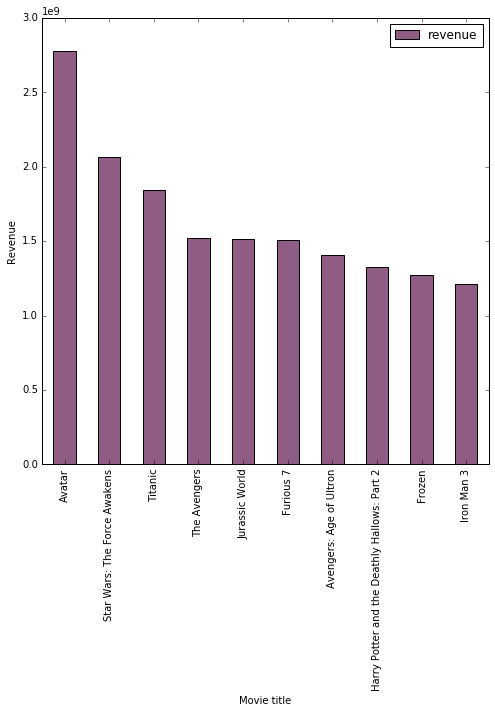

In [42]:
#Plot of the Top 10 movies that generated the most revenue
%matplotlib inline
colours = ["#915c83"]
revenue.plot(x = "original_title", y = 'revenue', kind = "bar", figsize=(8,8), color = colours)
plt.xlabel("Movie title")
plt.ylabel("Revenue")

<a id='Question2'></a>
### What are the bottom 10 movies that generated the least profit?

In [39]:
profit_low = df.nsmallest(n = 10, columns = ["profit"])
profit_low

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
2244,46528,tt1032751,0.250540,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,Assassin. Hero. Legend.,...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,4.250000e+08,11087569.000000,-413912431
5508,57201,tt1210819,1.214510,255000000,89289910,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,http://disney.go.com/the-lone-ranger/,Gore Verbinski,Never Take Off the Mask,...,149,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,2013-07-03,1607,6.0,2013,2.386885e+08,83578333.823191,-165710090
3484,50321,tt1305591,0.921653,150000000,38992758,Mars Needs Moms,Seth Green|Joan Cusack|Dan Fogler|Breckin Meye...,http://disney.go.com/disneypictures/marsneedsm...,Simon Wells,Mom needs a little space.,...,88,Adventure|Animation|Family,Walt Disney Animation Studios,2011-03-09,129,5.5,2011,1.454097e+08,37799503.280443,-111007242
6590,11619,tt0424095,1.390297,149000000,64459316,Flushed Away,Hugh Jackman|Kate Winslet|Ian McKellen|Jean Re...,http://www.dreamworksanimation.com/flushed/,David Bowers|Sam Fell,Someone's Going Down,...,85,Adventure|Animation|Comedy|Family,Aardman Animations|DreamWorks Animation,2006-10-22,488,6.0,2006,1.611687e+08,69723654.081770,-84540684
6309,10077,tt0318081,0.626900,80000000,5989640,A Sound of Thunder,Heike Makatsch|Armin Rohde|David Oyelowo|Wilfr...,http://asoundofthunder.warnerbros.com/,Peter Hyams,Some Rules Should Never Be Broken.,...,110,Thriller|Science Fiction|Adventure|Action,Epsilon Motion Pictures|Franchise Pictures|Bal...,2005-05-15,58,4.8,2005,8.932506e+07,6687812.142246,-74010360
2071,42888,tt1341188,0.640576,120000000,48668907,How Do You Know,Reese Witherspoon|Paul Rudd|Owen Wilson|Jack N...,http://www.howdoyouknow-movie.com/,James L. Brooks,How do you know it's love?,...,121,Comedy|Drama|Romance,Columbia Pictures|Gracie Films|Road Rebel,2010-12-17,136,4.9,2010,1.200000e+08,48668907.000000,-71331093
5469,49524,tt0790736,1.689869,130000000,61648500,R.I.P.D.,Jeff Bridges|Ryan Reynolds|Kevin Bacon|Stephan...,http://www.ripd.com/,Robert Schwentke,To protect and serve the living,...,96,Fantasy|Action|Comedy|Crime,Universal Pictures|Original Film|Dark Horse En...,2013-07-18,876,5.3,2013,1.216843e+08,57705052.146418,-68351500
4859,116977,tt0249516,0.111351,65000000,73706,Foodfight!,Charlie Sheen|Wayne Brady|Hilary Duff|Eva Long...,http://www.thresholdanimationstudios.com/video...,Lawrence Kasanoff,When good food... goes bad!,...,87,Animation|Action|Comedy|Family,Threshold Entertainment|Lions Gate Family Ente...,2012-06-15,12,2.2,2012,6.173338e+07,70001.852001,-64926294
8999,10153,tt0120184,1.152417,75000000,13100000,Sphere,Dustin Hoffman|Sharon Stone|Samuel L. Jackson|...,http://www.warnerbros.com/movies/home-entertai...,Barry Levinson,"A thousand feet beneath the sea, the blackest ...",...,134,Science Fiction,Punch Productions|Warner Bros.|Baltimore Pictu...,1998-02-13,238,5.6,1998,1.003272e+08,17523810.644926,-61900000
2747,12610,tt0181739,0.439101,75000000,13596911,Osmosis Jones,Chris Rock|Laurence Fishburne|David Hyde Pierc...,http://www.osmosisjones.com/,Bobby Farrelly|Peter Farrelly,Every BODY needs a hero,...,95,Adventure|Animation|Action|Comedy|Family,Conundrum Entertainment|Warner Bros. Animation...,2001-08-07,128,5.6,2001,9.236161e+07,16744434.320244,-61403089


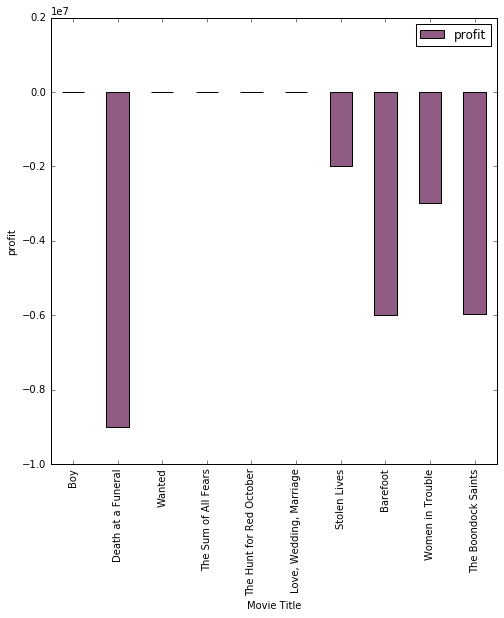

In [37]:
#Plot the bottom 10 movies by profit
%matplotlib inline
revenue_low.plot(x = 'original_title', y = "profit", kind = 'bar', figsize=(8,8), color = ["#915c83"])
plt.xlabel("Movie Title")
plt.ylabel("profit")

<a id='Question2'></a>
### What are the top 10 movies that generated the largest profit?

In [34]:
profit = df.nlargest(n = 10, columns = ['profit'])
profit

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,2544505847
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09,1645034188
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360
4361,24428,tt0848228,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,http://marvel.com/avengers_movie/,Joss Whedon,Some assembly required.,...,143,Science Fiction|Action|Adventure,Marvel Studios,2012-04-25,8903,7.3,2012,2.089437e+08,1.443191e+09,1299557910
3374,12445,tt1201607,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,http://www.harrypotter.com,David Yates,It all ends here.,...,130,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,2011-07-07,3750,7.7,2011,1.211748e+08,1.287184e+09,1202817822
14,99861,tt2395427,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,http://marvel.com/movies/movie/193/avengers_ag...,Joss Whedon,A New Age Has Come.,...,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,4304,7.4,2015,2.575999e+08,1.292632e+09,1125035767
5422,109445,tt2294629,6.112766,150000000,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,http://movies.disney.com/frozen,Chris Buck|Jennifer Lee,Only the act of true love will thaw a frozen h...,...,102,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2013-11-27,3369,7.5,2013,1.404050e+08,1.192711e+09,1124219009
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09,1082730962


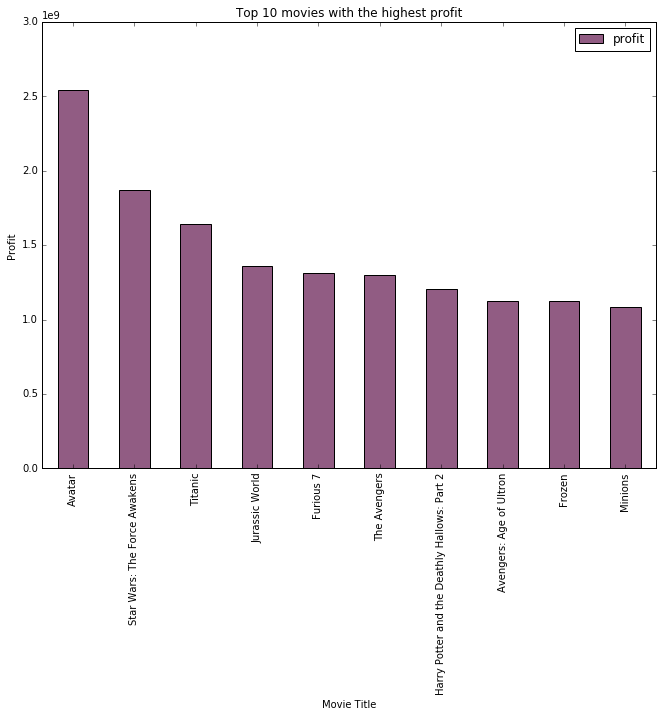

In [36]:
#Plot the top 10 movies with the highest profit 
profit.plot(x = 'original_title', y = 'profit', kind = "bar", title = "Top 10 movies with the highest profit", figsize=(11,8), color = '#915c83')
plt.xlabel("Movie Title")
plt.ylabel("Profit")

[Text(0.5,1,'Relationship between revenue and budget')]

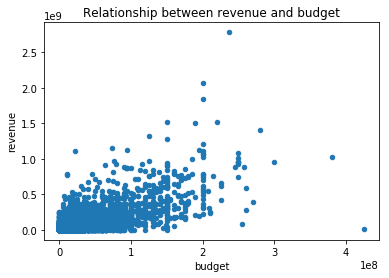

In [3]:
%matplotlib inline
import seaborn as sns    
df.plot(x="budget", y="revenue", kind = "scatter").set(title='Relationship between revenue and budget')

### Dividing Popularity into different parts

In [4]:
bin_labels = ['Low', 'Medium', 'Moderately High', 'High']
bin_edges = [df['popularity'].min(), df['popularity'].quantile(0.25), df['popularity'].quantile(0.5), df['popularity'].quantile(0.75), df['popularity'].max()]
df['popularity_level'] = pd.cut(df['popularity'], bin_edges, labels = bin_labels)
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,popularity_level
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,High
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,High


### Showing relationship between rating and popularity

In [5]:
vote_average_mean = df.groupby('popularity_level').vote_average.mean()
vote_average_mean

popularity_level
Low                5.900810
Medium             5.807474
Moderately High    5.910125
High               6.281156
Name: vote_average, dtype: float64

Text(0,0.5,'Popularity Level')

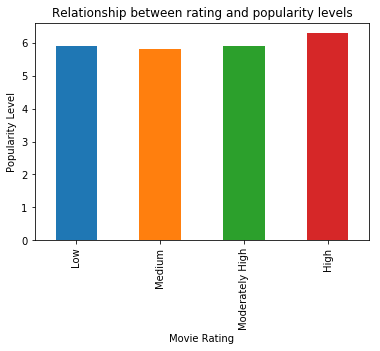

In [6]:
#Graphical representation of the relationship between rating and popularity
%matplotlib inline
import matplotlib.pyplot as plt
df.groupby('popularity_level').vote_average.mean().plot(kind = 'bar', title = 'Relationship between rating and popularity levels')
plt.xlabel('Movie Rating')
plt.ylabel('Popularity Level')

### Relationship between popularity & budget

[Text(0.5,1,'Relationship between popularity and budget')]

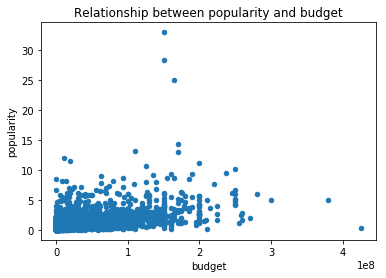

In [7]:
%matplotlib inline
import seaborn as sns    
df.plot(x="budget", y="popularity", kind = "scatter").set(title='Relationship between popularity and budget')

### Relationship between popularity & profit

In [32]:
#Relationship between popularity and profit
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
id,1,0.189301,-0.050921,-0.0314409,-0.0131225,0.0593679,0.00498488,0.494397,-0.116021,-0.102211,-0.0236877
popularity,0.189301,1,0.432791,0.594755,0.32239,0.744088,0.355904,0.0592429,0.419863,0.549299,0.582064
budget,-0.050921,0.432791,1,0.706888,0.337373,0.583038,0.0751682,0.17916,0.985112,0.566835,0.56916
revenue,-0.0314409,0.594755,0.706888,1,0.371226,0.775374,0.296501,0.0280223,0.713706,0.913802,0.983914
runtime,-0.0131225,0.32239,0.337373,0.371226,1,0.426505,0.38521,-0.0718635,0.361985,0.37198,0.346323
vote_count,0.0593679,0.744088,0.583038,0.775374,0.426505,1,0.464812,0.0712905,0.572798,0.703183,0.754078
vote_average,0.00498488,0.355904,0.0751682,0.296501,0.38521,0.464812,1,-0.163737,0.0882724,0.322503,0.325682
release_year,0.494397,0.0592429,0.17916,0.0280223,-0.0718635,0.0712905,-0.163737,1,0.0561739,-0.228469,-0.0126741
budget_adj,-0.116021,0.419863,0.985112,0.713706,0.361985,0.572798,0.0882724,0.0561739,1,0.613093,0.580845
revenue_adj,-0.102211,0.549299,0.566835,0.913802,0.37198,0.703183,0.322503,-0.228469,0.613093,1,0.919085


[Text(0.5,1,'Relationship between popularity and profit')]

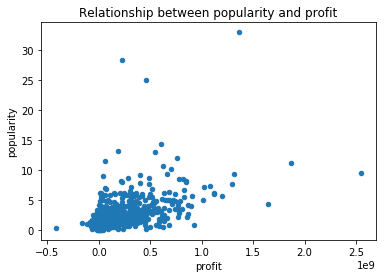

In [43]:
#Graphical representation of relationship between popularity & profit
%matplotlib inline
import seaborn as sns    
df.plot(x="profit", y="popularity", kind = "scatter").set(title='Relationship between popularity and profit')

In [37]:
df['budget'].value_counts().sort_values(ascending=False).head(11)

30000000.0     53
40000000.0     51
15000000.0     50
20000000.0     45
25000000.0     40
50000000.0     36
60000000.0     35
35000000.0     35
150000000.0    33
10000000.0     29
80000000.0     23
Name: budget, dtype: int64

In [34]:
df['budget'].describe()

count    1.287000e+03
mean     5.200349e+07
std      5.514540e+07
min      1.000000e+00
25%      1.400000e+07
50%      3.200000e+07
75%      7.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [39]:
df['revenue'].describe()

count    1.287000e+03
mean     1.762444e+08
std      2.538156e+08
min      4.300000e+01
25%      2.565097e+07
50%      8.208716e+07
75%      2.140694e+08
max      2.781506e+09
Name: revenue, dtype: float64

In [38]:
df['revenue'].value_counts().sort_values(ascending=False).head(11)

70000000.0     2
2500000.0      2
8454301.0      1
115350426.0    1
78382433.0     1
43.0           1
224920315.0    1
46.0           1
61255921.0     1
363398565.0    1
200.0          1
Name: revenue, dtype: int64

In [41]:
df['profit'].describe()

count    1.287000e+03
mean     1.242409e+08
std      2.183462e+08
min     -4.139124e+08
25%      3.142641e+06
50%      4.524300e+07
75%      1.470070e+08
max      2.544506e+09
Name: profit, dtype: float64

In [40]:
df['profit'].value_counts().sort_values(ascending=False).head(11)

-14000000.0     2
 44000000.0     2
 2000000.0      2
 102000000.0    2
 782244782.0    1
 32956317.0     1
 74974493.0     1
 40.0           1
 189268508.0    1
-2981903.0      1
 26092328.0     1
Name: profit, dtype: int64

Text(0.5,1,'Graph of revenue generated by the movies')

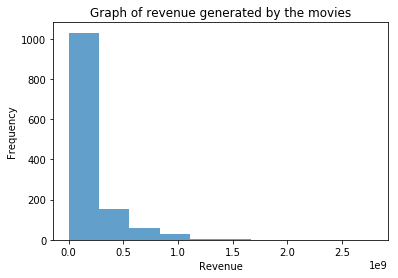

In [28]:
#Univariate graph of revenue
%matplotlib inline
import seaborn as sns
ind = df['revenue'].value_counts().index
df["revenue"].plot(kind="hist", alpha = 0.7)
plt.xlabel("Revenue")
plt.title("Graph of revenue generated by the movies")

Text(0.5,1,'Graph of budget exhausted by the movies')

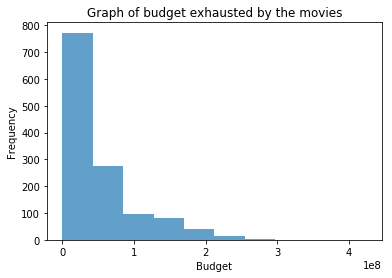

In [29]:
#Univariate graph of budget
%matplotlib inline
import seaborn as sns
ind = df['revenue'].value_counts().index
df["budget"].plot(kind="hist", alpha = 0.7)
plt.xlabel("Budget")
plt.title("Graph of budget exhausted by the movies")

Text(0.5,1,'Graph of profit generated by the movies')

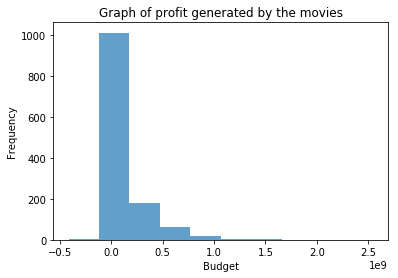

In [33]:
#Univariate graph of profit
%matplotlib inline
import seaborn as sns
ind = df['revenue'].value_counts().index
df["profit"].plot(kind="hist", alpha = 0.7)
plt.xlabel("Budget")
plt.title("Graph of profit generated by the movies")

### Does the length of a movie affect its popularity?

[Text(0.5,1,'Relationship between popularity and runtime')]

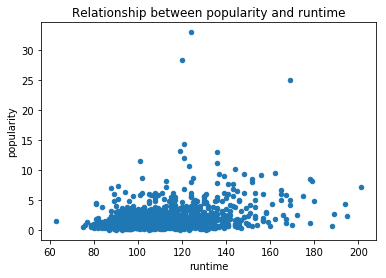

In [30]:
#Graphical representation of relationship between popularity & runtime
%matplotlib inline
import seaborn as sns    
df.plot(x="runtime", y="popularity", kind = "scatter").set(title='Relationship between popularity and runtime')

###  Directors with the highest revenue

In [20]:
value = df.groupby("director")['revenue'].sum()
value.sort_values(ascending = False)

director
Peter Jackson                                                                      5.943643e+09
Steven Spielberg                                                                   5.257606e+09
James Cameron                                                                      4.721952e+09
David Yates                                                                        4.154296e+09
Christopher Nolan                                                                  4.053834e+09
George Lucas                                                                       3.201551e+09
Francis Lawrence                                                                   3.179980e+09
Michael Bay                                                                        3.164378e+09
Sam Raimi                                                                          3.079058e+09
Gore Verbinski                                                                     3.016686e+09
Joss Whedon                    

In [21]:
#Most popular directors
value = df.groupby(["director"])['popularity'].sum()
value.sort_values(ascending = False)

director
Christopher Nolan                       60.449268
Peter Jackson                           45.005375
Colin Trevorrow                         32.985763
Ridley Scott                            30.297828
Steven Spielberg                        29.388996
George Miller                           29.350856
David Fincher                           29.083811
Francis Lawrence                        26.625627
Quentin Tarantino                       26.515804
George Lucas                            22.777755
David Yates                             20.506537
Robert Zemeckis                         19.116869
James Cameron                           18.873334
Gore Verbinski                          18.749069
J.J. Abrams                             16.297872
Ron Howard                              15.790972
Sam Mendes                              15.359589
Len Wiseman                             15.296487
Jon Favreau                             14.995421
Robert Schwentke                        1

<a id='conclusions'></a>
## Conclusions

> **•** The dataset contains 54 years of movies data, cutting across several genres.

> **•** From the dataset there are 574 movies that are Adventure or Action or Science Fiction movies. Also, 196 movies are romantic movies, 35 are history movies and 32  War movies. There are 163 Family movies, about 38 Music movies and 139 Horror movies. We also see that 1102 movies are not Adventure or Action movies and 830 movies are Drama or Comedy movies.

> **•** Avatar generated the most revenue and the most profit overall. It also ranks 12th on the all time most popular movie. It premiered in 2009 and was the most popular movie that year.

> **•** The movie, Boy generated the least revenue although compared to its budget there was significant profit.

> **•** Not only that avatar generated the most revenue, it also generated the most profit with the movie The Warrior's Way running at a loss.

> **•** The Warrior's Way exhausted the most budget despite having the least profit. Love, Wedding, Marriage exhausted the least budget but still made significant profit.

> **•** The most popular movie is the Adventure movie released in 2015, titled Jurassic World. Also having an excellent revenue and profit record. On the other hand, The movie Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð is the least popular movie though that didn't affect its revenue generated and profit made.

> **•** Most of the movie which generated the most revenue and profit had adventure and action in their genres, most movies with comedy and drama generated lesser profit and revenue. This constraint also affected the popularity of the movie. A couple of the movies with the biggest budget didn't generate as much traction, profit or revenue and weren't all that popular.

> **•** Talking about popularity & profit, from the visualization above we can notice a strong positive correllation between revenue and budget this means that in most cases the higher the budget for a movie there's a probability that the movie would generate as much profit. 

> **•** Also, we saw the relationship between popularity and rating. we saw from the chart that movies which were very popular had higher ratings than the less popular movies, this may be as a result of the most talked about movie being watched and loved by viewers ends up getting a good rating and movies that are not really talked about were not really seen by most viewers and had poor rating. 

> **•** Don't you think this will affect profit? Well, looking at the other correllation matrix table and the scatter plot, we'd notice a positive correlation between profit and popularity. What this implies is that as people keep talking about a movie, recommending it and making the movie trend, the revenue less the budget increases and this is more money for the directors and every one concerned.

> **•** So, if you are looking for a movie director to generate a lot of revenue for you then Peter Jackson is the man for you. He is the all time director with the highest revenue generated.

> **•** Christopher Nolan had a fair share of the recognition as he is the most popular movie director.

> **•** Revenue is skewed to the left with most of its values clustered between 0 - 1 X 10^(9), on the other hand, budget is also skewed to the left with most of its values between 0 - 2.5 X 10^(8). Some movies seem to run at a loss as profit margin ranges between -0.5 - 1 X 10^(9).

> **•** Let's look at runtime and popularity. The correlation between runtime and popularity depicts a low positive correlation. What does this mean? Well, it means that the popularity of a movie does not really depend on its length. As mentioned above there are other factors that greatly influence popularity based on this dataset.

### Limitations
> **•** The final cost of making a movie was not given
 
> **•** Social media comments or ratings were not given

> **•** Details of the rating column was not given

> **•** Also, from the correlation matrix table, Id was correlated with release year with a strong positive correlation but the id was just used to number the movie and has nothing to do with it the release year. This shows that correlation at times doees not necessarily imply causation.

> **•** Amount of people that streamed the movie was not given

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])